<a href="https://colab.research.google.com/github/marcospiau/ia368-dd-dl4ir/blob/main/aula08-inpars/03_synthetic_data_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hardware info

In [1]:
!echo *********
!echo lspu is "$(lscpu)"
# !echo *********
!echo free -mh is "$(free -mh)"
# !echo *********
!echo TPU_NAME is $TPU_NAME

sample_data
lspu is Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   46 bits physical, 48 bits virtual
CPU(s):                          2
On-line CPU(s) list:             0,1
Thread(s) per core:              2
Core(s) per socket:              1
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           79
Model name:                      Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:                        0
CPU MHz:                         2199.998
BogoMIPS:                        4399.99
Hypervisor vendor:               KVM
Virtualization type:             full
L1d cache:                       32 KiB
L1i cache:                       32 KiB
L2 cache:                        256 KiB
L3 cache:                        55 MiB
NUMA node0 CPU(s):             

# Gcloud authentication

In [2]:
import os
from google.colab import auth
import tensorflow_gcs_config

os.environ['USE_AUTH_EPHEM'] = '0'
auth.authenticate_user(clear_output=False)

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=C26TSk7ycBfMsQ1zfqNunSHWbSGERb&prompt=consent&access_type=offline&code_challenge=9mvu4sr_PRAmdI3SCmxfrPJI4yaDh-1KzNe4S9_ULGQ&code_challenge_method=S256

Enter authorization code: 4/0AbUR2VNWqZUv2Lg7Gi3OlsPxjvwIG9P13kVFVDAFINmH97UXkJVCnNWH37TbQnvhHeAlzQ


In [3]:
!gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Sud2a6cgipbGdd32y8JGUaQ8ssqwzw&prompt=consent&access_type=offline&code_challenge=aUMBrbWsqTp3ZVtnjGwz2ii7hpjuem7Kx8atwGPlheE&code_challenge_method=S256

Enter authorization code: 4/0AbUR2VNpP3ofcXiMVISUik93rAZpD-91s3FFDZaNJLO8Fns9ol-8uLLTwZRBMslcfLo-wg

You are now logged in as [m136825@dac.unicamp.br].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID


In [4]:
!gcloud auth application-default login


The environment variable [GOOGLE_APPLICATION_CREDENTIALS] is set to:
  [/content/.adc/adc.json]
Credentials will still be generated to the default location:
  [/content/.config/application_default_credentials.json]
To use these credentials, unset this environment variable before
running your application.

Do you want to continue (Y/n)?  Y

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=Ym1Yk5Gmcd2NfCm0K0q2GWIVpxof0W&prompt=consent&access_type=offline&code_challenge=Z_fnU0uE0VL0Uy5mzr4KaEZTPkaGAx3E8sNeCa0G170&code_chal

In [5]:
BUCKET = 'gs://aula08-inpars'
os.environ['BUCKET'] = BUCKET
!gsutil ls {BUCKET}
!gsutil ls $BUCKET

gs://aula08-inpars/castorini_baseline/
gs://aula08-inpars/teste_score_eval/
gs://aula08-inpars/castorini_baseline/
gs://aula08-inpars/teste_score_eval/


# Installs

Anserini, pyserini and anserini-tools:

In [6]:
%%capture
!wget -nc https://raw.githubusercontent.com/marcospiau/ia368-dd-dl4ir/main/scripts/install_anserini.sh && chmod +x install_anserini.sh && time ./install_anserini.sh

Pygaggle:

In [7]:
!git clone --recursive https://github.com/castorini/pygaggle.git

Cloning into 'pygaggle'...
remote: Enumerating objects: 1562, done.
remote: Counting objects: 100% (702/702), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 1562 (delta 595), reused 500 (delta 471), pack-reused 860
Receiving objects: 100% (1562/1562), 512.80 KiB | 5.63 MiB/s, done.
Resolving deltas: 100% (1001/1001), done.
Submodule 'tools' (https://github.com/castorini/anserini-tools.git) registered for path 'tools'
Cloning into '/content/pygaggle/tools'...
remote: Enumerating objects: 788, done.        
remote: Counting objects: 100% (545/545), done.        
remote: Compressing objects: 100% (467/467), done.        
remote: Total 788 (delta 101), reused 514 (delta 77), pack-reused 243        
Receiving objects: 100% (788/788), 119.60 MiB | 10.51 MiB/s, done.
Resolving deltas: 100% (185/185), done.
Submodule path 'tools': checked out '808f48711b5e172da6aec8b1855518c8ea65489f'


T5 (from pypi) and remaining stuff:

In [8]:
%%capture
!pip install -q ftfy polars toolz cytoolz transformers datasets dm-tree
!pip install -U t5[gcp,cache-tasks]==0.9.3
!pip install -U jaxlib
!sudo apt install -qq tree htop

Open AI stuff:

In [9]:
!pip install -q openai tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.3 MB/s eta 0:00:00


**Restart before continuing**

# Imports

In [182]:
import os
import pandas as pd
import polars as pl
import ftfy
import datasets
import numpy as np
import json

import toolz
import random

import functools
from tqdm import tqdm
from pathlib import Path
import pickle
from collections import Counter, defaultdict

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)

os.environ['POLARS_FMT_STR_LEN']='1000'

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

os.environ['POLARS_FMT_STR_LEN']='1000'

In [2]:
import openai
import getpass
openai.api_key = getpass.getpass('Type you OPENAI_API_KEY: ')

Type you OPENAI_API_KEY: ··········


In [193]:
# adding a random integer for each random id
# seed=12 (row number for my name on google sheets)
DEFAULT_RANDOM_SEED = 12

# Data preparation

## Copying data from GCP

We already preprocessed some files on previous notebooks, so we will just copy it locally instead of reprocessing them again.

rsync data from gcp to local folder:

In [3]:
!mkdir -pv aula08-inpars
!gsutil -m rsync -r gs://aula08-inpars/ aula08-inpars/
!tree -lht aula08-inpars/

mkdir: created directory 'aula08-inpars'
Building synchronization state...
Starting synchronization...
Copying gs://aula08-inpars/teste_score_eval/predictions.txt.lengths...
Copying gs://aula08-inpars/teste_score_eval/predictions.txt.targets...
Copying gs://aula08-inpars/castorini_baseline/castorini-baseline-t5-input.txt...
Copying gs://aula08-inpars/castorini_baseline/trec-covid-corpus.tsv...
Copying gs://aula08-inpars/castorini_baseline/trec-covid-qrels_trec_format.txt...
Copying gs://aula08-inpars/castorini_baseline/trec-covid-queries_trec_format.txt...
Copying gs://aula08-inpars/castorini_baseline/run.title_and_text_no_expansion.txt...
Copying gs://aula08-inpars/castorini_baseline/castorini-baseline-monot5-base-predictions.txt-1100000...
Copying gs://aula08-inpars/castorini_baseline/castorini-baseline-t5-input_ids.txt...
Copying gs://aula08-inpars/teste_score_eval/predictions.txt.scores...
Copying gs://aula08-inpars/teste_score_eval/teste_score_eval_run.txt...
Copying gs://aula08-i

## Testing some prompts

You are a human annotator with biomedical expertise. Generate a relevant question for the passage below:
#######
Nitric oxide: a pro-inflammatory mediator in lung disease? Inflammatory diseases of the respiratory tract are commonly associated with elevated production of nitric oxide (NO•) and increased indices of NO• -dependent oxidative stress. Although NO• is known to have anti-microbial, anti-inflammatory and anti-oxidant properties, various lines of evidence support the contribution of NO• to lung injury in several disease models. On the basis of biochemical evidence, it is often presumed that such NO• -dependent oxidations are due to the formation of the oxidant peroxynitrite, although alternative mechanisms involving the phagocyte-derived heme proteins myeloperoxidase and eosinophil peroxidase might be operative during conditions of inflammation. Because of the overwhelming literature on NO• generation and activities in the respiratory tract, it would be beyond the scope of this commentary to review this area comprehensively. Instead, it focuses on recent evidence and concepts of the presumed contribution of NO• to inflammatory diseases of the lung.

You are a human annotator with biomedical expertise. Generate a question that is both relevant and complex for a given passage; also, output on a 0-100 scale indicating how certain you are of the question you created. Use the output format: f'query: {query}\nscore: {score}\n'. Give no explanations.

#######Passage#######
Nitric oxide: a pro-inflammatory mediator in lung disease? Inflammatory diseases of the respiratory tract are commonly associated with elevated production of nitric oxide (NO•) and increased indices of NO• -dependent oxidative stress. Although NO• is known to have anti-microbial, anti-inflammatory and anti-oxidant properties, various lines of evidence support the contribution of NO• to lung injury in several disease models. On the basis of biochemical evidence, it is often presumed that such NO• -dependent oxidations are due to the formation of the oxidant peroxynitrite, although alternative mechanisms involving the phagocyte-derived heme proteins myeloperoxidase and eosinophil peroxidase might be operative during conditions of inflammation. Because of the overwhelming literature on NO• generation and activities in the respiratory tract, it would be beyond the scope of this commentary to review this area comprehensively. Instead, it focuses on recent evidence and concepts of the presumed contribution of NO• to inflammatory diseases of the lung.


You are a human annotator with biomedical expertise. Generate a question that could be made by an specialist while researching about a new disease; also, output on a 0-100 scale indicating how certain you are of the question you created. Return a json-formatted string like {'query':<query>, 'score': <score>}

#######Passage#######
Nitric oxide: a pro-inflammatory mediator in lung disease? Inflammatory diseases of the respiratory tract are commonly associated with elevated production of nitric oxide (NO•) and increased indices of NO• -dependent oxidative stress. Although NO• is known to have anti-microbial, anti-inflammatory and anti-oxidant properties, various lines of evidence support the contribution of NO• to lung injury in several disease models. On the basis of biochemical evidence, it is often presumed that such NO• -dependent oxidations are due to the formation of the oxidant peroxynitrite, although alternative mechanisms involving the phagocyte-derived heme proteins myeloperoxidase and eosinophil peroxidase might be operative during conditions of inflammation. Because of the overwhelming literature on NO• generation and activities in the respiratory tract, it would be beyond the scope of this commentary to review this area comprehensively. Instead, it focuses on recent evidence and concepts of the presumed contribution of NO• to inflammatory diseases of the lung.

ChatGPT
{'query': 'What is the role of nitric oxide in lung injury and inflammation?', 'score': 90}

In [4]:
df_corpus = pl.read_csv('aula08-inpars/castorini_baseline/trec-covid-corpus.tsv',
                        has_header=False, separator='\t',
                        new_columns=['id', 'text'])
df_corpus.shape, df_corpus.head()

((171332, 2),
 shape: (5, 2)
 ┌──────────┬───────────────────────────────────────────────────────────────────────────────────────┐
 │ id       ┆ text                                                                                  │
 │ ---      ┆ ---                                                                                   │
 │ str      ┆ str                                                                                   │
 ╞══════════╪═══════════════════════════════════════════════════════════════════════════════════════╡
 │ ug7v899j ┆ Clinical features of culture-proven Mycoplasma pneumoniae infections at King          │
 │          ┆ Abdulaziz University Hospital, Jeddah, Saudi Arabia. OBJECTIVE: This retrospective    │
 │          ┆ chart review describes the epidemiology and clinical features of 40 patients with     │
 │          ┆ culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University          │
 │          ┆ Hospital, Jeddah, Saudi Arabia. METHODS

In [5]:
# Return a json-formatted string like {'query':<query>, 'score': <score>}
# Não está gerando o json sempre, vou tirar
# zero_shot_prompt_template = """\
# You are a human annotator with biomedical expertise.
# Generate a question that could be made by an specialist while researching about a new disease;
# also, output on a 0-100 scale with two decimal places indicating how certain you are of the question you created.
# Return a *json* with keys 'query' and 'score'.

# #######Passage#######
# {}"""

# zero_shot_prompt_template = """\
# You are a human annotator with biomedical expertise.
# Generate a single question that could be helpful for a specialist looking to draw complex conclusions while researching about a new disease.

# #######Passage#######
# {}"""

# Provavelmente vai esse
# zero_shot_prompt_template = """\
# You are a human annotator with biomedical expertise.
# Generate a single question that could be helpful for a specialist who is searching for a very specific piece of information within a large corpus of scientific publications

# #######Passage#######
# {}"""

zero_shot_prompt_template = """\
You are a human annotator with biomedical expertise.
Generate a single question that could be helpful for a specialist who is searching for a very specific piece of information within a large corpus of scientific publications.
If the text contains a "result" of "conclusion" section, the question should be focused on it.

#######Passage#######
{}"""

print(zero_shot_prompt_template)

df_zero_shot_prompt = (
    df_corpus
    # selecting examples with more characters for bias the model towards more complex texts
    .filter(pl.col('text').str.lengths().gt(500))
    .with_columns(pl.format(
        zero_shot_prompt_template, 'text').alias('prompt'))
)
df_zero_shot_prompt.shape, df_zero_shot_prompt.head()

print(df_zero_shot_prompt.sample(1).to_dicts()[0]['prompt'])

You are a human annotator with biomedical expertise.
Generate a single question that could be helpful for a specialist who is searching for a very specific piece of information within a large corpus of scientific publications.
If the text contains a "result" of "conclusion" section, the question should be focused on it.

#######Passage#######
{}
You are a human annotator with biomedical expertise.
Generate a single question that could be helpful for a specialist who is searching for a very specific piece of information within a large corpus of scientific publications.
If the text contains a "result" of "conclusion" section, the question should be focused on it.

#######Passage#######
Biobanking in microbiology: From sample collection to epidemiology, diagnosis and research. Millions of biological samples, including cells of human, animal or bacterial origin, viruses, serum/plasma or DNA/RNA, are stored every year throughout the world for diagnostics and research. The purpose of this re

## Creating a dataframe with basic information for all prompts

To avoid overwriting data and compromising reproducibility, we are going to save a dataframe containing document id, text that will be used for data generation and a integer key used for subsetting data for generation.

In [6]:
def get_random_indexes(n, seed):
    """Get a random permutation of n elements with a seed"""
    return np.random.default_rng(seed=seed).permutation(range(n))

In [7]:
# selecting examples with more characters for bias the model towards more complex texts
df_base_prompt = df_corpus.filter(
    pl.col('text').str.lengths().gt(500))

# adding a random integer for each random id
# seed=DEFAULT_RANDOM_SEED (row number for my name on google sheets)
df_base_prompt = df_base_prompt.with_columns(pl.Series(get_random_indexes(len(df_base_prompt),
                                                                DEFAULT_RANDOM_SEED)).alias('random_key'))
df_base_prompt = df_base_prompt.sort('random_key')

# adding a random key and sorting by it - we are going to use it for better reproducibility

df_base_prompt.shape, df_base_prompt.head()

((122560, 3),
 shape: (5, 3)
 ┌──────────┬──────────────────────────────────────────────────────────────────────────┬────────────┐
 │ id       ┆ text                                                                     ┆ random_key │
 │ ---      ┆ ---                                                                      ┆ ---        │
 │ str      ┆ str                                                                      ┆ i64        │
 ╞══════════╪══════════════════════════════════════════════════════════════════════════╪════════════╡
 │ ejrcujnx ┆ Clinical ethics during the Covid-19 pandemic: Missing the trees for the  ┆ 0          │
 │          ┆ forest.. The SARS-CoV2 pandemic has exposed the acute vulnerability of   ┆            │
 │          ┆ the health systems of countries worldwide. While countries are           ┆            │
 │          ┆ scrambling to contain the spread of the infection, the focus is largely  ┆            │
 │          ┆ on infection prevention strategies such

In [9]:
!mkdir -pv aula08-inpars/synthetic-data-generation
df_base_prompt.write_ipc('aula08-inpars/synthetic-data-generation/df_base_prompt.arrow')
!ls -lht aula08-inpars/synthetic-data-generation

total 182M
-rw-r--r-- 1 root root 182M May  3 13:28 df_base_prompt.arrow


## Prompt v1

This version instructs the `gpt-3.5-turbo` model to generate annotated questions that would be helpful for a researcher looking for information about a specific topic. We want to emphasize that the intended user of the generated questions will be a specialist, in order to encourage the model to generate more complex and advanced questions.

In [10]:
def format_prompt(text, fmt_template):
    return fmt_template.format(text)

# Since there won't be enough time to experiment with more combinations, this
# function will be kept simple to avoid overthinking
def get_zeroshot_openai_response(doc_id, prompt, cache_dict, max_tokens=100):
    cache_key = doc_id, prompt, max_tokens
    # # por BURRICE, estava retornando o cache inteiro 
    # if cache_key in cache_dict:
    #     return cache_dict
    # por BURRICE, estava retornando o cache inteiro 
    if cache_key in cache_dict:
        return cache_dict[cache_key].copy()

    response = openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=[
            {'role': 'system', 'content': 'You are a human annotator with biomedical expertise.'},
            {'role': 'user', 'content': prompt}
        ],
        temperature=0,
        max_tokens=max_tokens)

    out = json.loads(str(response))
    cache_dict[cache_key] = out
    return out

In [11]:
zero_shot_prompt_template_v1 = """\
Generate a single question that could be helpful for a specialist who is searching for a very specific piece of information within a large corpus of scientific publications.

#######Passage#######
{}"""

In [12]:
cache_dict_v1 = {}

The code below was run by increasing the number of rows until we reached 1000 examples:

In [21]:
tqdm._instances.clear()

In [22]:
# Antes de cair: 88%|████████▊ | 879/1000 [40:00<05:23,  2.67s/it]
raw_responses_v1 = {
    (x['id'], x['random_key']): get_zeroshot_openai_response(
        doc_id=x['id'],
        prompt=format_prompt(x['text'], zero_shot_prompt_template_v1),
        cache_dict=cache_dict_v1)
    for x in tqdm(df_base_prompt.head(1000).to_dicts())
}

100%|██████████| 1000/1000 [04:55<00:00,  3.38it/s]


Total time until this step:

In [23]:
!uptime

 14:21:48 up  1:18,  0 users,  load average: 0.61, 0.75, 0.72


In [24]:
list(cache_dict_v1.values())[-1]

{'choices': [{'finish_reason': 'stop',
   'index': 0,
   'message': {'content': 'What is the difference in postoperative rotational and pivot-shift laxity between anatomic double-bundle anterior cruciate ligament reconstruction and nonanatomic single-bundle reconstruction?',
    'role': 'assistant'}}],
 'created': 1683123520,
 'id': 'chatcmpl-7C7bU7JS6PInOdllR6cktgsM6CwWl',
 'model': 'gpt-3.5-turbo-0301',
 'object': 'chat.completion',
 'usage': {'completion_tokens': 34, 'prompt_tokens': 563, 'total_tokens': 597}}

In [25]:
Path('aula08-inpars/synthetic-data-generation/raw_responses_v1.pickle').write_bytes(pickle.dumps(raw_responses_v1))
Path('aula08-inpars/synthetic-data-generation/cache_dict_v1.pickle').write_bytes(pickle.dumps(cache_dict_v1))
!ls -lht aula08-inpars/synthetic-data-generation/

total 185M
-rw-r--r-- 1 root root 2.1M May  3 14:22 cache_dict_v1.pickle
-rw-r--r-- 1 root root 460K May  3 14:22 raw_responses_v1.pickle
-rw-r--r-- 1 root root 182M May  3 13:28 df_base_prompt.arrow


In [29]:
!tree -lht aula08-inpars/

aula08-inpars/
├── [4.0K]  teste_score_eval
│   ├── [244K]  true_50klines.txt
│   ├── [505K]  predictions.txt.scores
│   ├── [244K]  predictions.txt.targets
│   ├── [ 98K]  predictions.txt.lengths
│   └── [2.0M]  teste_score_eval_run.txt
├── [4.0K]  castorini_baseline
│   ├── [577K]  castorini-baseline-t5-input_ids.txt
│   ├── [1023K]  trec-covid-qrels_trec_format.txt
│   ├── [3.6K]  trec-covid-queries_trec_format.txt
│   ├── [1.8M]  run.title_and_text_no_expansion.txt
│   ├── [ 81M]  castorini-baseline-t5-input.txt
│   ├── [185M]  trec-covid-corpus.tsv
│   └── [1.2M]  castorini-baseline-monot5-base-predictions.txt-1100000
└── [4.0K]  synthetic-data-generation
    ├── [182M]  df_base_prompt.arrow
    ├── [2.1M]  cache_dict_v1.pickle
    └── [460K]  raw_responses_v1.pickle

3 directories, 15 files


In [27]:
!gsutil -m rsync -r aula08-inpars/ gs://aula08-inpars/

Building synchronization state...
Starting synchronization...
Computing CRC32C for file://aula08-inpars/castorini_baseline/castorini-baseline-t5-input.txt...
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/castorini-baseline-monot5-base-predictions.txt-1100000
Computing CRC32C for file://aula08-inpars/castorini_baseline/trec-covid-corpus.tsv...
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/castorini-baseline-t5-input.txt
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/castorini-baseline-t5-input_ids.txt
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/run.title_and_text_no_expansion.txt
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/trec-covid-qrels_trec_format.txt
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/trec-covid-corpus.tsv
Copying mtime from src to dst for gs://aula08-inpars/castorini_baseline/trec-covid-queries_trec_format.txt
Cop

In [30]:
next(iter(raw_responses_v1.values()))

{'choices': [{'finish_reason': 'stop',
   'index': 0,
   'message': {'content': 'What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?',
    'role': 'assistant'}}],
 'created': 1683120535,
 'id': 'chatcmpl-7C6pL0kNFTtM5FjsQJbrkazQgZFQm',
 'model': 'gpt-3.5-turbo-0301',
 'object': 'chat.completion',
 'usage': {'completion_tokens': 38, 'prompt_tokens': 274, 'total_tokens': 312}}

All generations returned 1 choice:

In [41]:
Counter(len(x['choices']) for x in raw_responses_v1.values())

Counter({1: 1000})

None of the generations were truncated:

In [39]:
Counter(x['choices'][0]['finish_reason'] for x in raw_responses_v1.values())

Counter({'stop': 1000})

Number of words in a query:

count    1000.000000
mean       24.752000
std         6.841586
min         9.000000
25%        20.000000
50%        24.000000
75%        29.000000
max        53.000000
dtype: float64

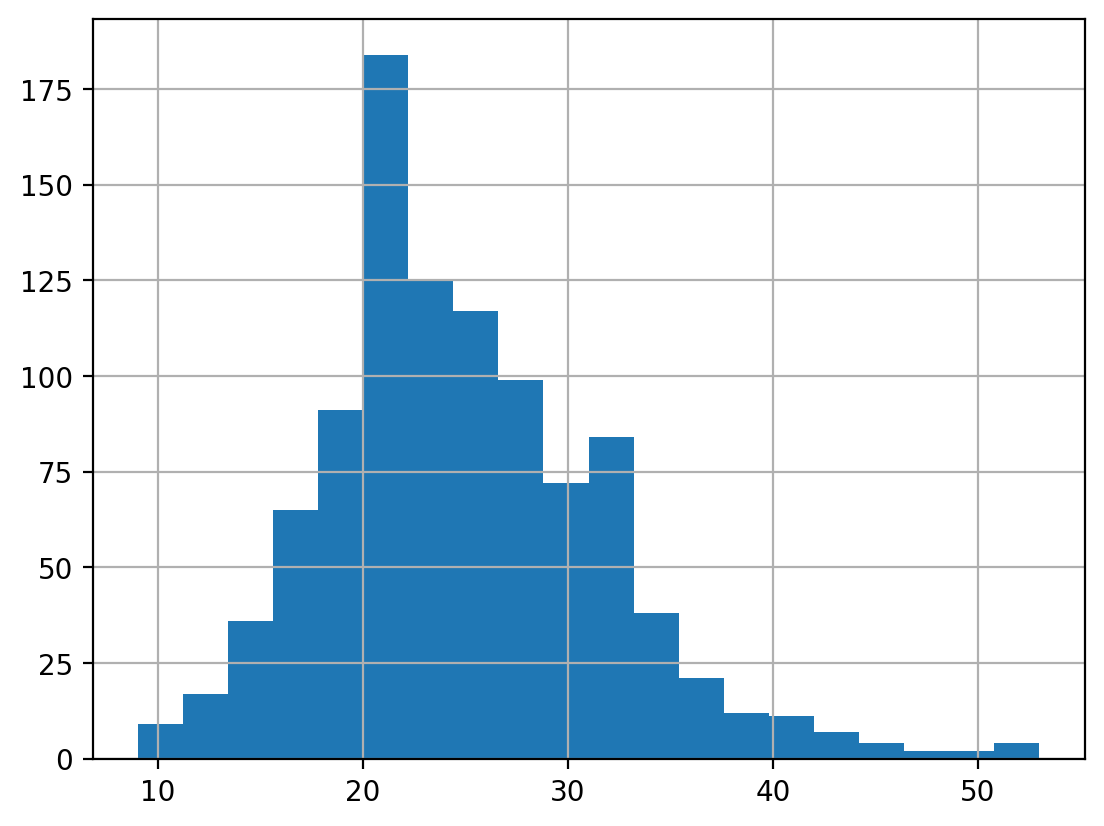

In [51]:
gen_wc = pd.Series([len(x['choices'][0]['message']['content'].split()) for x in raw_responses_v1.values()])
display(gen_wc.describe())
_ = gen_wc.hist(bins=20)

In [239]:
def get_query_from_raw_response(response):
    """Return the prediction with no preprocessing"""
    raw = response['choices'][0]['message']['content']
    return raw

def raw_response_to_dataframe(raw_responses: dict):
    """Convert raw response dict to dataframe for easier manipulation"""
    def to_dict(item):
        (doc_id, random_key), response = item
        query = get_query_from_raw_response(response)

        return {'doc_id': doc_id, 'random_key': random_key, 'query': query}

    dicts = map(to_dict, raw_responses.items())
    df = pl.DataFrame(dicts)
    return df
    return list(dicts)



df_queries_v1 = raw_response_to_dataframe(raw_responses_v1)
df_queries_v1

doc_id,random_key,query
str,i64,str
"""ejrcujnx""",0,"""What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?"""
"""20ihafqw""",1,"""What factors are associated with compliance with recommended behaviors during a pandemic influenza outbreak, including the role of trust, risk perception, worry, and exposure to educational campaigns and media exaggeration?"""
"""bac9geag""",2,"""What are the strengths and weaknesses of pandemic influenza preparedness plans in the Asia-Pacific region and how do they compare to those in Europe?"""
"""zp4yv4cp""",3,"""What are the sources of tension between population health and political power within the concept of public health, and why are these strains durable and irresolvable?"""
"""u5nibp17""",4,"""What is the optimal level of quarantine and isolation needed to control the spread of COVID-19, and how does it vary with the rate of quarantine and isolation?"""
"""9ga0hklg""",5,"""What is the effect of IFN-α on IFN-γ production by Vγ9Vδ2 T-cells during chronic HCV infection, and how does it improve their function capability?"""
"""l5441kqp""",6,"""What are the enabling opportunities and challenges that the Internet of Things (IoT) brings to actors in the quadruple helix, including industry, government, universities, and end users?"""
"""zxe95qy9""",7,"""What is the historical perspective on the use and implications of quarantine as a public health strategy for controlling epidemic diseases?"""
"""1uiobtjv""",8,"""What are the epitopes recognized by the monoclonal antibodies Cys3F11 and Cys2E5 that distinguish cystatins SA1 and SA2?"""


## Generating negative examples

Positive training examples will be the generated queries. For the negative ones, we will use random doc_ids returned from a BM25 search using the generated queries and the original corpus.

This index was already created on previous classes, so we are going to download and reuse it instead of constructing a new one.

In [88]:
from pyserini.index.lucene import IndexReader
from pyserini.search.lucene import LuceneSearcher

In [92]:
# downloading the index
# !gsutil ls gs://marcospiau-doc2query-aula05/runs/run.title_and_text_no_expansion.txt
!gsutil ls gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/

gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fdm
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fdt
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fdx
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fnm
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.nvd
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.nvm
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.si
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.tvd
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.tvm
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.tvx
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0_Lucene90_0.doc
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0_Lucene90_0.dvd
gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansio

In [98]:
!mkdir -pv indexes/title_and_text_no_expansion/
!gsutil -m cp -nr gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/ indexes/
!tree -lht indexes

mkdir: created directory 'indexes'
mkdir: created directory 'indexes/title_and_text_no_expansion/'
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.nvm...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fdm...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fdt...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fdx...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.si...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.tvm...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.fnm...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.tvx...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.nvd...
Copying gs://marcospiau-doc2query-aula05/indexes/title_and_text_no_expansion/_0.tvd...
Copying gs://marcospiau-doc2quer

In [145]:
from pyserini.index.lucene import IndexReader
from pyserini.search.lucene import LuceneSearcher

# we need the index with raw docs, not the slim one
index_reader = IndexReader('indexes/title_and_text_no_expansion')
searcher = LuceneSearcher('indexes/title_and_text_no_expansion')
# BM25 default parameters (this is probably already set)
searcher.set_bm25(0.9, 0.4)
vars(searcher)

{'index_dir': 'indexes/title_and_text_no_expansion',
 'object': <io.anserini.search.SimpleSearcher at 0x7fbe4dba6390 jclass=io/anserini/search/SimpleSearcher jself=<LocalRef obj=0x4cc6bf8 at 0x7fbcc538d850>>,
 'num_docs': 171331}

In [146]:
index_reader.stats()

{'total_terms': 20822821,
 'documents': 171331,
 'non_empty_documents': 171331,
 'unique_terms': 202648}

In [138]:
df_queries_v1.head()

doc_id,random_key,query
str,i64,str
"""ejrcujnx""",0,"""What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?"""
"""20ihafqw""",1,"""What factors are associated with compliance with recommended behaviors during a pandemic influenza outbreak, including the role of trust, risk perception, worry, and exposure to educational campaigns and media exaggeration?"""
"""bac9geag""",2,"""What are the strengths and weaknesses of pandemic influenza preparedness plans in the Asia-Pacific region and how do they compare to those in Europe?"""
"""zp4yv4cp""",3,"""What are the sources of tension between population health and political power within the concept of public health, and why are these strains durable and irresolvable?"""
"""u5nibp17""",4,"""What is the optimal level of quarantine and isolation needed to control the spread of COVID-19, and how does it vary with the rate of quarantine and isolation?"""


In [197]:
df_queries_v1.to_dicts()[0]

{'doc_id': 'ejrcujnx',
 'random_key': 0,
 'query': 'What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?'}

In [263]:
%%time
def get_negative_doc_ids(doc_id, query, searcher, k=1000,
                         seed=DEFAULT_RANDOM_SEED, **_):
    results = [
        (x.docid, x.score)
        for x in searcher.search(query, k=k+1)
        # we dont want to use the same doc_id both as
        # both positive and negative examples
        if x.docid != doc_id
    ]
    random.Random(seed).shuffle(results)
    out = [x[0] for x in results[:k]]
    return out

    
get_negative_doc_ids_partial = functools.partial(
    get_negative_doc_ids,
    searcher=searcher,
    k=1000
)

def add_negative_doc_ids_to_df(df, fn):
    df = df.with_columns(
        df.to_struct('_')
        .apply(lambda x: fn(**x)).alias( 'negative_doc_ids'))
    return df

add_negative_doc_ids_to_df(df_queries_v1.head(), get_negative_doc_ids_partial)

CPU times: user 546 ms, sys: 829 µs, total: 547 ms
Wall time: 549 ms


doc_id,random_key,query,negative_doc_ids
str,i64,str,list[str]
"""ejrcujnx""",0,"""What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?""","[""qe0vxmox"", ""82gaerf4"", … ""f8h9hlks""]"
"""20ihafqw""",1,"""What factors are associated with compliance with recommended behaviors during a pandemic influenza outbreak, including the role of trust, risk perception, worry, and exposure to educational campaigns and media exaggeration?""","[""ajnyt1km"", ""6w7ng885"", … ""asercjr3""]"
"""bac9geag""",2,"""What are the strengths and weaknesses of pandemic influenza preparedness plans in the Asia-Pacific region and how do they compare to those in Europe?""","[""q5pke4tw"", ""05czlqp2"", … ""zf7jd3qk""]"
"""zp4yv4cp""",3,"""What are the sources of tension between population health and political power within the concept of public health, and why are these strains durable and irresolvable?""","[""7jj00r66"", ""nfz8w8na"", … ""nczeiqmb""]"
"""u5nibp17""",4,"""What is the optimal level of quarantine and isolation needed to control the spread of COVID-19, and how does it vary with the rate of quarantine and isolation?""","[""hilf0r9t"", ""26s2anvp"", … ""v99vlnox""]"


In [264]:
%%time
df_queries_v1 = add_negative_doc_ids_to_df(df_queries_v1, get_negative_doc_ids_partial)
df_queries_v1.head()

CPU times: user 1min 49s, sys: 185 ms, total: 1min 49s
Wall time: 1min 50s


doc_id,random_key,query,negative_doc_ids
str,i64,str,list[str]
"""ejrcujnx""",0,"""What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?""","[""qe0vxmox"", ""82gaerf4"", … ""f8h9hlks""]"
"""20ihafqw""",1,"""What factors are associated with compliance with recommended behaviors during a pandemic influenza outbreak, including the role of trust, risk perception, worry, and exposure to educational campaigns and media exaggeration?""","[""ajnyt1km"", ""6w7ng885"", … ""asercjr3""]"
"""bac9geag""",2,"""What are the strengths and weaknesses of pandemic influenza preparedness plans in the Asia-Pacific region and how do they compare to those in Europe?""","[""q5pke4tw"", ""05czlqp2"", … ""zf7jd3qk""]"
"""zp4yv4cp""",3,"""What are the sources of tension between population health and political power within the concept of public health, and why are these strains durable and irresolvable?""","[""7jj00r66"", ""nfz8w8na"", … ""nczeiqmb""]"
"""u5nibp17""",4,"""What is the optimal level of quarantine and isolation needed to control the spread of COVID-19, and how does it vary with the rate of quarantine and isolation?""","[""hilf0r9t"", ""26s2anvp"", … ""v99vlnox""]"


All examples have 1_0000 negative examples:

In [277]:
df_queries_v1.select(pl.col('negative_doc_ids').arr.lengths().value_counts())

negative_doc_ids
struct[2]
"{1000,1000}"


In [269]:
df_queries_v1.write_ipc('aula08-inpars/synthetic-data-generation/df_queries_v1.arrow')
!ls -lht aula08-inpars/synthetic-data-generation/

total 211M
-rw-r--r-- 1 root root  16M May  3 17:40 df_queries_v1.arrow
-rw-r--r-- 1 root root  11M May  3 17:37 marcospiau_1k_v1.jsonl
-rw-r--r-- 1 root root 2.1M May  3 14:22 cache_dict_v1.pickle
-rw-r--r-- 1 root root 460K May  3 14:22 raw_responses_v1.pickle
-rw-r--r-- 1 root root 182M May  3 13:28 df_base_prompt.arrow


Formatting the file that will be sent to our HuggingFace Dataset:

In [270]:
df_queries_v1_hf = df_queries_v1.select(
    pl.col('doc_id').alias('positive_doc_id'),
    'query',
    'negative_doc_ids'
)
df_queries_v1_hf.head()

positive_doc_id,query,negative_doc_ids
str,str,list[str]
"""ejrcujnx""","""What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?""","[""qe0vxmox"", ""82gaerf4"", … ""f8h9hlks""]"
"""20ihafqw""","""What factors are associated with compliance with recommended behaviors during a pandemic influenza outbreak, including the role of trust, risk perception, worry, and exposure to educational campaigns and media exaggeration?""","[""ajnyt1km"", ""6w7ng885"", … ""asercjr3""]"
"""bac9geag""","""What are the strengths and weaknesses of pandemic influenza preparedness plans in the Asia-Pacific region and how do they compare to those in Europe?""","[""q5pke4tw"", ""05czlqp2"", … ""zf7jd3qk""]"
"""zp4yv4cp""","""What are the sources of tension between population health and political power within the concept of public health, and why are these strains durable and irresolvable?""","[""7jj00r66"", ""nfz8w8na"", … ""nczeiqmb""]"
"""u5nibp17""","""What is the optimal level of quarantine and isolation needed to control the spread of COVID-19, and how does it vary with the rate of quarantine and isolation?""","[""hilf0r9t"", ""26s2anvp"", … ""v99vlnox""]"


In [271]:
df_queries_v1_hf.write_ndjson('aula08-inpars/synthetic-data-generation/marcospiau_1k_v1.jsonl')
!ls -lht aula08-inpars/synthetic-data-generation/

total 211M
-rw-r--r-- 1 root root  11M May  3 17:40 marcospiau_1k_v1.jsonl
-rw-r--r-- 1 root root  16M May  3 17:40 df_queries_v1.arrow
-rw-r--r-- 1 root root 2.1M May  3 14:22 cache_dict_v1.pickle
-rw-r--r-- 1 root root 460K May  3 14:22 raw_responses_v1.pickle
-rw-r--r-- 1 root root 182M May  3 13:28 df_base_prompt.arrow


In [ ]:
!head aula08-inpars/synthetic-data-generation/*.jsonl
!ls -lht aula08-inpars/synthetic-data-generation/*.jsonl
!wc -l aula08-inpars/synthetic-data-generation/*.jsonl


{"positive_doc_id":"ejrcujnx","query":"What are the ethical conflicts between public health-driven focus of Covid-19 prevention and containment measures versus patient-centered care for those who suffer the illness and the consequent moral distress of healthcare providers?","negative_doc_ids":["qe0vxmox","82gaerf4","y6ntkpal","1g2fgsdy","j74bejgi","rlqxmf1l","eham6trt","phao3mlj","t8165mdx","xsb56aj6","ucc6owat","1sngodb6","bcd0y9c1","rvyoaqy8","4woc4d1q","no8bgglk","9b4dxdyr","3ehzct6i","kshjqsdj","crfn58c8","3msnnoj6","w1870ayn","dzmbfp2g","hr28qy4t","7incf20e","nfg613c9","fqp9wqgm","2nqava5a","mbs0mddg","ey2djr28","n5s44u3c","8w3xyfvw","pnzxkkmx","doyscgbx","9erjf8rk","8gfvsku2","wahcfox7","wvfm8y72","zmpbp4nk","wbbotohj","7hqn997j","dgvgi270","jkmihpt5","d6zwg2lp","45xycxxd","3xfhjddg","d7zsw2yx","poxr7vzb","hax4pdvh","tvs1snq8","tuk1l0b4","2a12nsnl","8wxkrv6h","4ccluw7p","4kf9mgy8","awbl4bxg","k9257jaa","nz0ylacz","0btb65c5","ix9x25sc","jb7kdabi","mof6nazf","rugijb30","e544gdzx","

This json file will be manually downloaded and uploaded to HuggingFaceHub.

Sending data to GCP:

In [273]:
!gsutil -m rsync -r aula08-inpars/ gs://aula08-inpars/

Building synchronization state...
Starting synchronization...
Copying file://aula08-inpars/synthetic-data-generation/df_queries_v1.arrow [Content-Type=application/octet-stream]...
Copying file://aula08-inpars/synthetic-data-generation/marcospiau_1k_v1.jsonl [Content-Type=application/octet-stream]...
- [2/2 files][ 26.2 MiB/ 26.2 MiB] 100% Done                                    
Operation completed over 2 objects/26.2 MiB.                                     
